<a href="https://colab.research.google.com/github/yibesh/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Filter (Kernel): Small 3×3 grid that slides across the image to detect patterns like edges or corners.

*   Convolution: The process of applying the filter to extract features

*   Pooling: Reduces image size and keeps important features (makes training faster).

*   Flatten: Converts the 2D features into a 1D list for the dense layers.

*   Dense (Fully Connected): Learns to combine features to make the final classification.










/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8974 - loss: 0.3281 - val_accuracy: 0.9828 - val_loss: 0.0515
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9875 - val_loss: 0.0382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accuracy: 0.9896 - val_loss: 0.0304
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9907 - val_loss: 0.0297
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9912 - val_loss: 0.0290
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9919 - val_loss: 0.0284
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9969 -

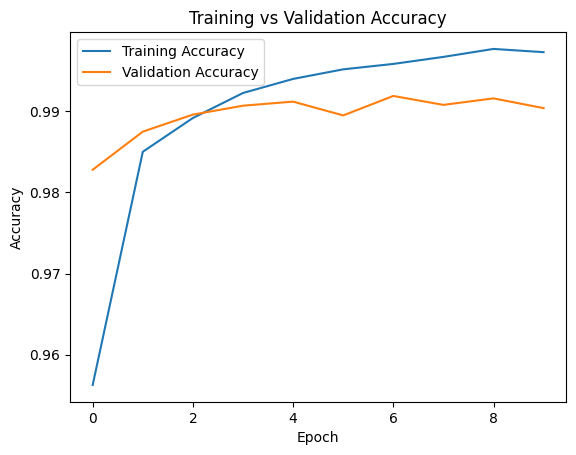

In [5]:
# Simple CNN example for beginners using the MNIST dataset

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# ------------------------------------------------------------
# 1. Load and preprocess the MNIST dataset
# ------------------------------------------------------------
# MNIST is a dataset of handwritten digits (0–9)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# CNN expects input in 4D: (samples, height, width, channels)
# The images are 28x28 pixels, and since they are grayscale → 1 channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0  # Normalize to [0,1]
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0     # Normalize to [0,1]

# ------------------------------------------------------------
# 2. Build the CNN model
# ------------------------------------------------------------
model = models.Sequential([
    # First convolution layer: detects features like edges
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # - 32 filters (feature detectors), - Each filter is 3x3 in size, - Stride = 1 (moves one pixel at a time)

    # Pooling layer: reduces image size to keep important features only
    # Reduces image size by half → makes training faster and avoids overfitting
    layers.MaxPooling2D((2,2)), #  - Takes the maximum value in each 2x2 region,

    # Second convolution layer: detects more complex patterns
    # Learns more detailed features (like curves, edges, corners)
    layers.Conv2D(64, (3,3), activation='relu'), # 64 filters, each of size 3x3

    # Another pooling layer for Again reduces the spatial dimension
    layers.MaxPooling2D((2,2)),

    # Flatten: convert 2D feature maps to 1D vector for dense layers
    layers.Flatten(), #Needed before feeding into Dense (fully connected) layers

    # Fully connected layer (dense): learns relationships between features
    #Each neuron connects to every neuron from the previous layer
    #Learns combinations of features to make better predictions
    layers.Dense(64, activation='relu'), # 64 neurons

    # Output layer: 10 neurons for 10 digit classes (0–9)
    layers.Dense(10, activation='softmax') #Softmax converts outputs to probabilities for each class
])

# ------------------------------------------------------------
# 3. Compile the model
# ------------------------------------------------------------
# Choose optimizer, loss function, and performance metric
model.compile(
    optimizer='adam', # Adam optimizer → adjusts learning rate automatically
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy → suitable for integer labels (0–9)
    metrics=['accuracy']
)

# ------------------------------------------------------------
# 4. Train the model
# ------------------------------------------------------------
# Train for 10 epochs (complete passes through training data)
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)  # check performance on test data
)

# ------------------------------------------------------------
# 5. Evaluate the model
# ------------------------------------------------------------
# Test the model on unseen test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ------------------------------------------------------------
# 6. Visualize training accuracy
# ------------------------------------------------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


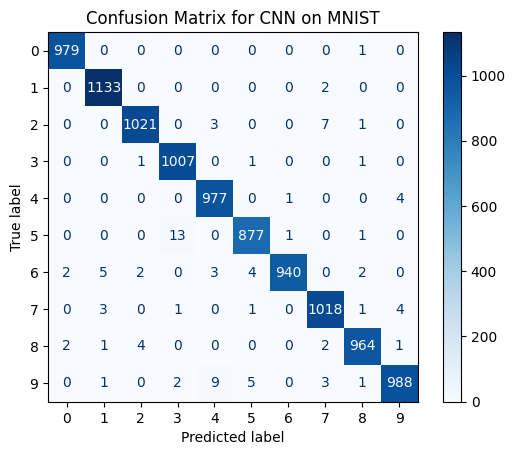

In [6]:
# ------------------------------------------------------------
# 7. Confusion Matrix
# ------------------------------------------------------------
# Get model predictions for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Convert probabilities to label numbers

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CNN on MNIST")
plt.show()